In [2]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score, roc_curve, auc, mean_squared_error
import matplotlib.pyplot as plt


%matplotlib inline

In [3]:
#Adjust so all plots are the same
from matplotlib import pyplot as plt
plt.rcParams['figure.facecolor'] = 'lavender'
plt.rcParams['savefig.facecolor']= 'lavender'
plt.rcParams['axes.facecolor'] = 'white' #'oldlace'
plt.rcParams['font.family'] = 'Times New Roman'
plt.rc('axes',edgecolor='black')

In [48]:
df = pd.read_csv('examples.csv')

In [49]:
df = df.sort_values(by='Emissions', ascending=True)

In [50]:
# Example: Changing the value in the first row (index 0) of the column 'Name'
df.at[10, 'Diet'] = 'Shaq'


In [51]:
df

,Diet,Emissions,Emissions_vs_Avg,Price,Calories,Protein,Carbohydrates,Fats
0,Optimal,1.960950,-0.58,4.813690,2800.000000,116.034318,367.017427,109.035079
3,Vegetarian,1.960950,-0.58,4.813690,2800.000000,116.034318,367.017427,109.035079
4,Pescatarian,2.337982,-0.50,5.775587,2800.000000,127.641134,350.955590,111.225608
7,No Nuts,2.520614,-0.47,6.063708,2800.000000,116.585048,421.136692,78.000000
1,Tommy,3.595628,-0.24,4.946117,2800.000000,145.388893,327.838337,109.304368
10,Shaq,3.988025,-0.16,9.027169,8608.745310,294.000000,1470.000000,194.000000
9,Cheap,4.611513,-0.02,2.776374,2800.000000,129.508407,275.000000,142.992921
2,Rory,4.700219,-0.00,5.283856,2800.000000,174.903882,278.210544,119.562381
5,No Gluten,4.762469,0.01,13.125904,2800.000000,131.812724,339.455710,118.292220
6,No Lactose,4.762469,0.01,13.125904,2800.000000,131.812724,339.455710,118.292220


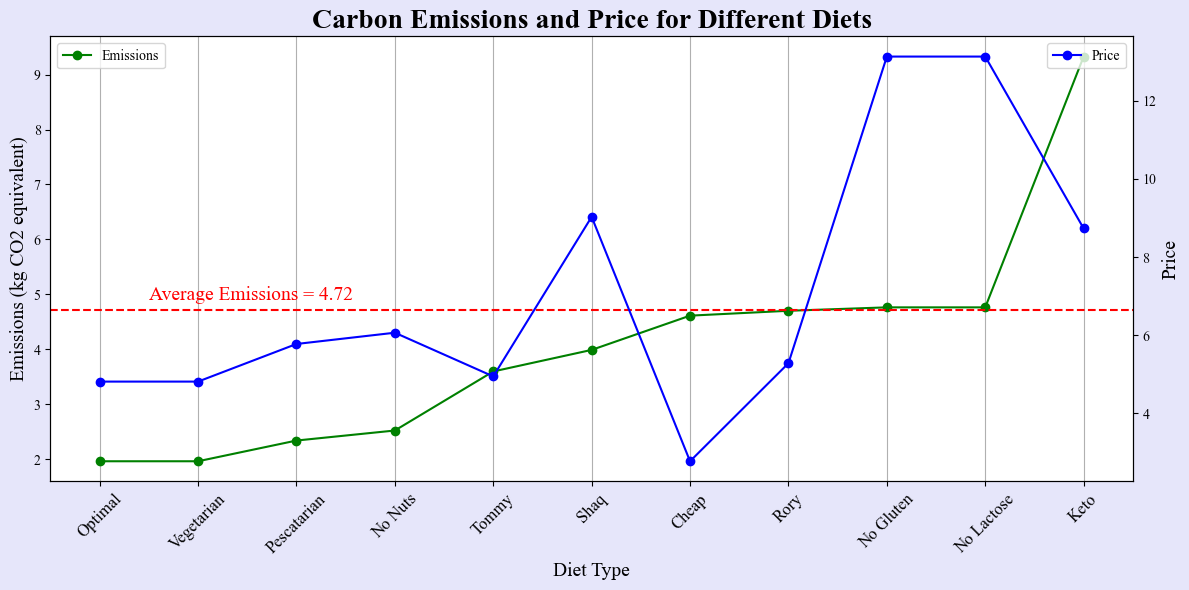

In [63]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting emissions
ax1.plot(df['Diet'], df['Emissions'], color='green', marker='o', label='Emissions')
ax1.set_xlabel('Diet Type', fontsize=14)
ax1.set_ylabel('Emissions (kg CO2 equivalent)', fontsize=14)
ax1.tick_params(axis='y')#, labelcolor='green')

ax1.axhline(y = 4.72, color = 'r', linestyle = 'dashed') 
ax1.text(0.5, 4.9, 'Average Emissions = 4.72', fontsize = 14, color = 'red')
# Instantiate a second y-axis sharing the same x-axis
ax2 = ax1.twinx()  
ax2.plot(df['Diet'], df['Price'], color='blue', marker='o', label='Price')
ax2.set_ylabel('Price', fontsize=14)  
ax2.tick_params(axis='y')#, labelcolor='blue')

# Title and set x-axis labels with proper rotation
plt.title('Carbon Emissions and Price for Different Diets', fontsize=20, fontweight='bold')
ax1.set_xticks(df['Diet'])
ax1.set_xticklabels(df['Diet'], rotation=45, fontsize=12)

# Adding vertical gridlines
ax1.grid(axis='x')

# Optional: Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.savefig('emissions_price_diets.png', dpi=300, bbox_inches='tight', format='png')
plt.show()

In [30]:
df2 = pd.read_csv('final_df.csv')

In [31]:
df2.at[35, 'price'] = 0.02255

In [32]:
df2 = df2.drop(index = 34)
expensive = df2.sort_values(by='price', ascending=False).head(5)
expensive.at[33, 'food'] = 'Beef'
expensive.at[42, 'food'] = 'Shrimp'

In [33]:
expensive

,food,emissions,price,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
35,Lamb & Mutton,0.0245,0.02255,100,2.83,0.200,0.081,0.97,0.81,0.934,...,0.1965,0.08120,0.08320,0.01400,0.97,0.0,0.0114,0.0,0.0,0.5509
16,Palm Oil,0.0076,0.01727,100,8.84,1.000,0.490,0.00,0.00,0.003,...,1.0000,0.49300,0.37000,0.09300,0.00,0.0,0.0000,0.0,0.0,0.0000
33,Beef,0.0596,0.01593,100,1.98,0.130,0.053,0.62,0.68,0.674,...,0.1273,0.05335,0.04800,0.00532,0.62,0.0,0.0171,0.0,0.0,0.6713
42,Shrimp,0.0118,0.01455,100,1.01,0.015,0.003,0.36,7.05,0.000,...,0.0147,0.00290,0.00220,0.00750,0.36,0.0,0.0211,0.0,0.0,0.7491
19,Olive Oil,0.0060,0.01178,100,8.84,1.000,0.140,0.00,0.02,0.003,...,1.0000,0.13808,0.72961,0.10523,0.00,0.0,0.0000,0.0,0.0,0.0000


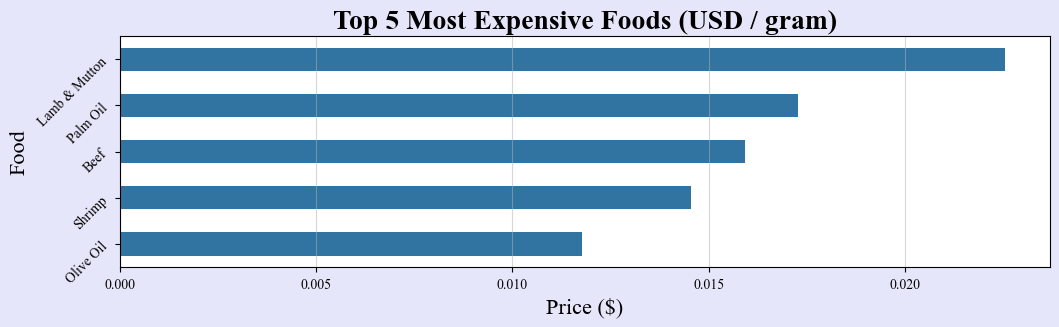

In [38]:

# Plot
plt.figure(figsize=(12, 3))
sns.barplot(x='price', y='food', data=expensive, width=0.5)
plt.title('Top 5 Most Expensive Foods (USD / gram)', fontsize=20, fontweight='bold')
plt.xlabel('Price (\$)', fontsize = 16)
plt.ylabel('Food', fontsize= 16)
plt.yticks(rotation=45, fontsize=10)
plt.grid(axis='x', alpha =0.5)
plt.savefig('expensive_foods.png', dpi=300, bbox_inches='tight', format='png')
plt.show()